In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
S0 = 100
T = 1.0
# Risk-neutral short rate
r1 = 0.05
r2 = 0.08
# Probability of ruin at each time step
p1 = 0.001
p2 = 0.002
sigma = 0.2
n_pers = 1000
n_paths = 1000

In [3]:
def get_paths(r):
    res = np.zeros((n_pers, n_paths))
    res[0] = S0
    dt = T / n_pers
    for t in range(1, n_pers):
        res[t] = res[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(n_paths))
    return res

In [4]:
a_ret = get_paths(r1)
b_ret = get_paths(r2)

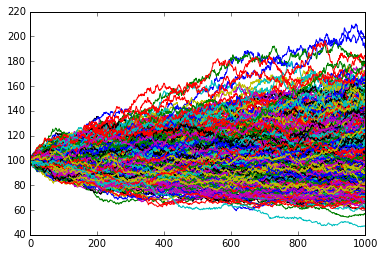

In [5]:
plt.plot(a_ret)
plt.show()

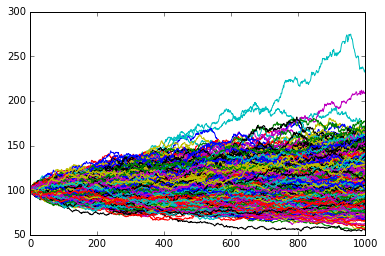

In [6]:
plt.plot(b_ret)
plt.show()

In [7]:
print a_ret[:, a_ret.shape[1] - 1].mean()
print b_ret[:, b_ret.shape[1] - 1].mean()

101.387004169
116.412766196


In [8]:
def get_paths1(r, p):
    res = np.zeros((n_pers, n_paths))
    res[0] = S0
    dt = T / n_pers
    for t in range(1, n_pers):
        ruin = npr.rand(n_paths)
        ruin_idx = np.where(ruin < p)
        res[t] = res[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(n_paths))
        res[t, ruin_idx] = 0
    return res

In [9]:
a_surv = get_paths1(r1, p1)
b_surv = get_paths1(r2, p2)

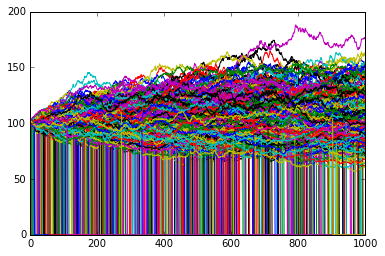

In [10]:
plt.plot(a_surv)
plt.show()

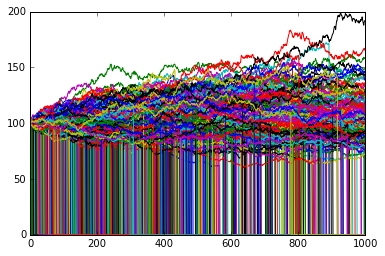

In [11]:
plt.plot(b_surv)
plt.show()

In [12]:
print a_surv[:, a_surv.shape[1] - 1].mean()
print b_surv[:, b_surv.shape[1] - 1].mean()

93.4128896534
86.6240096632
